In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = 7.03 # Area - Mi^2
flow_file = 'caudal.csv'
precip_file = 'precip.csv'
dt = 0.5 # time step - hours
S0 = 0

### Read files

In [3]:
flow = np.loadtxt(flow_file, delimiter=',')
precip = np.loadtxt(precip_file, delimiter=',')

### Plot figure

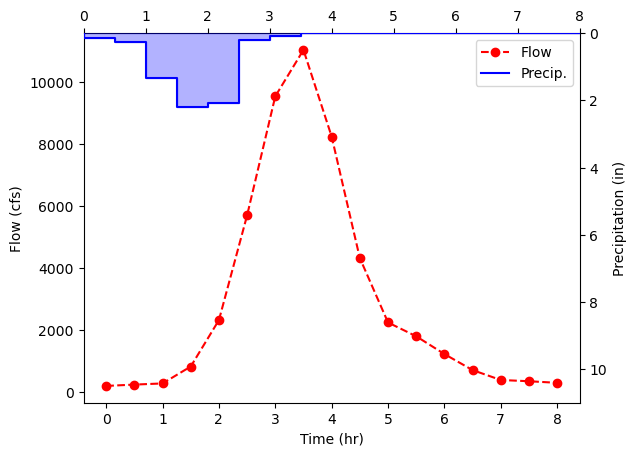

In [4]:
fig = plt.figure()

ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111, frame_on=False)

# Flow
ax1.plot(flow[:,0], flow[:,1],'--o',color='red', label='Flow')
ax1.set_ylabel('Flow (cfs)')
ax1.set_xlabel('Time (hr)')

# Precip
ax2.fill_between(precip[:,0], precip[:,1], step="pre", alpha=0.3, color='blue')
ax2.step(precip[:,0], precip[:,1], color='blue', label='Precip.')
ax2.set_ylabel('Precipitation (in)')
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.set_xlim([0,max(flow[:,0])])
ax2.set_ylim([5*max(precip[:,1]), 0])

# Legend
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=1)

plt.show()

### Main

In [5]:
# Compute average inputs and outputs
t = flow[:,0]
I = precip[:,1]
O = flow[:,1]

# Transform flow into runoff in discrete steps
R = [0]
for i, _ in enumerate(O):
    if i > 0:
        R_i = (O[i] + O[i - 1])/2 * dt * 3600 / (A * (5280)**2) * 12
        R = R + [R_i]

R = np.array(R)
dS = I - R
S = S0 + np.cumsum(dS)

### Result plot

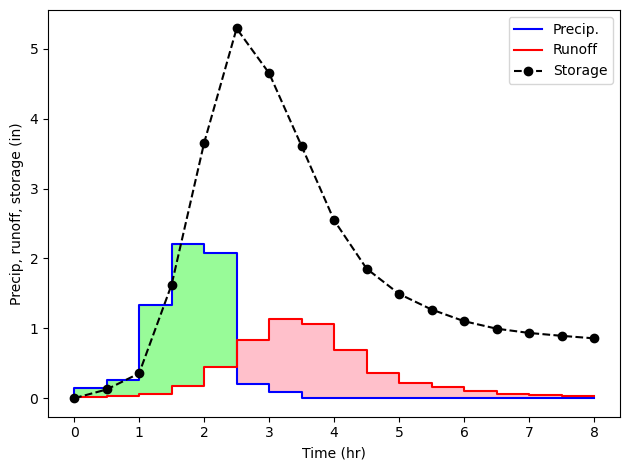

In [9]:
fig, axs = plt.subplots(1, 1)

# Flow
axs.fill_between(t, I, R, where= R != I, step="pre", facecolor='pink')
axs.fill_between(t, I, R, where= I >=R, step="pre", facecolor='palegreen')
axs.step(t, I, color='blue', label='Precip.')
axs.step(t, R, color='red', label='Runoff')
axs.plot(t, S, '--o', color='black', label='Storage')
axs.set_ylabel('Precip, runoff, storage (in)')
axs.set_xlabel('Time (hr)')

axs.legend()
fig.tight_layout()
plt.show()